In [1]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

We are given a toy data set consisting of 10 training examples $\{x_n, y_n\}^{10}_{n=1}$ with each input $x_n$ as well as the output $y_n$ being scalars. The data is as follows.

In [2]:
x = np.array([-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62])
y = np.array([1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51])

In [3]:
def phi_transform(x, k):
    """
    map each input x to a (k+1) dimensional vector using 
    the mapping phi_k(x) = [1,x,x^2,x^3,...x^k]^T
    """
    phi_x = np.zeros((len(x), k+1))
    for i in range(0,len(x)):
        for j in range(0,k+1):
            phi_x[i][j] = x[i]**j
    return phi_x

In [4]:
# define hyperparams
beta = 4 # noise precision
_lambda = 1 # prior precision
k_values = [1, 2, 3, 4] # list of possible values that k can take


x_range = np.linspace(-4, 4, num=1000) # range on which plots will be made

$1.$  The posterior of $w$ and plot with 10 random functions drawn from the inferred
posterior for each $k$.

$\mathbf{X}, \bm{y} = \{\phi(x_n)^T, y_n\}_{n=1}^N$

Likelihood: $p\left(\bm{y}\vert\mathbf{X}, \bm{w}\right) = {\mathcal N} \left(\bm{y} \vert \mathbf{X} \bm{w}, \beta^{-1} \mathbf{I}_N\right)$

Prior: $p\left(\bm{w}\vert\lambda\right) = {\mathcal N} \left(\bm{w} \vert \mathbf{0}, \lambda^{-1} \mathbf{I}_D\right)$

Posterior: $p\left(\bm{w}\vert\mathbf{X}, \bm{y}, \beta, \lambda\right) = {\mathcal N} \left( \bm{w}\vert \mu_N, \Sigma_N \right)$, where

$\Sigma_N = \left(\lambda \mathbf{I}_D + \beta \mathbf{X}^T \mathbf{X} \right)^{-1}$

$\mu_N = \beta \Sigma_N \mathbf{X}^T \bm{y}$

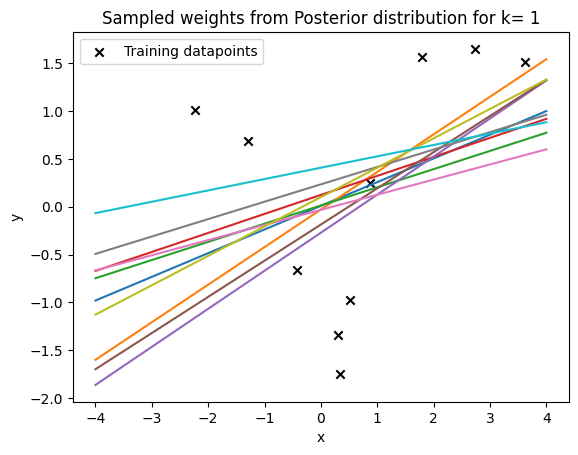

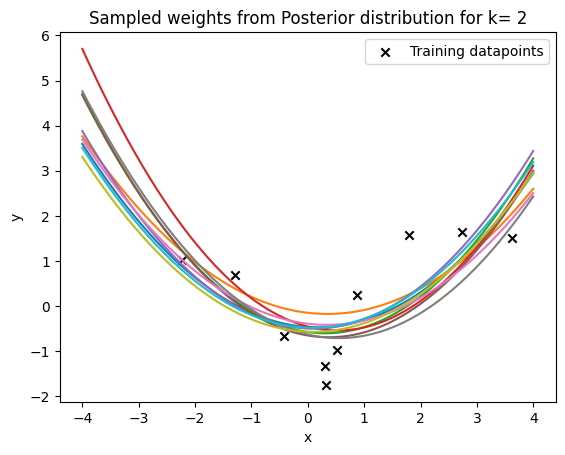

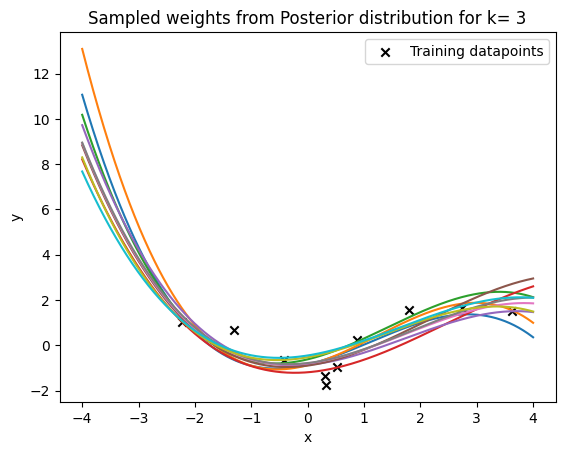

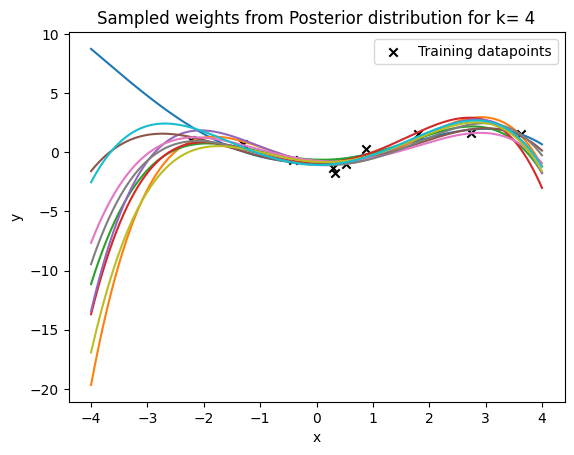

In [5]:
for k in k_values:
    X = phi_transform(x, k)
    Y = y.reshape(y.shape[0], 1)
    N, D = X.shape
    Sigma_N = np.linalg.inv(_lambda * np.eye(D) + beta * np.matmul(X.T, X))
    mu_N = beta * np.matmul(Sigma_N, np.matmul(X.T, Y))
    #print(mu_N.shape)

    posterior_w_sampled = np.random.multivariate_normal(mu_N.reshape(mu_N.shape[0]), Sigma_N, 10)
    
    plt.scatter(x, y, c="Black", marker="x")
    x_space = phi_transform(x_range, k)
    #print(x_space.shape)
    #print(posterior_w_sampled[0].shape)
    for i in range(10):
        plt.plot(x_range, np.matmul(x_space, posterior_w_sampled[i].reshape(posterior_w_sampled[i].shape[0], 1)))
    plt.title(f"Sampled weights from Posterior distribution for k= {k}")
    plt.xlabel(r'x')
    plt.ylabel(r'y')
    plt.legend(["Training datapoints"])
    plt.savefig('6_posterior_'+ str(k) + '.png')
    
    plt.show()

$2.$  posterior predictive $p\left(y_*\vert \phi(\bm{x_*}), \mathbf{X}, \bm{y}\right) = {\mathcal N} \left(\mu^T_N \phi(\bm{x_*}), \beta^{-1} + \phi(\bm{x}_*)^T \Sigma_N \phi(\bm{x}_*)\right)$ on $x_* \in [-4,4]$

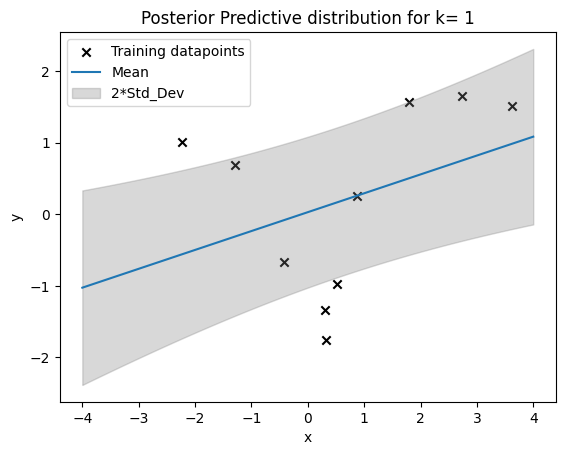

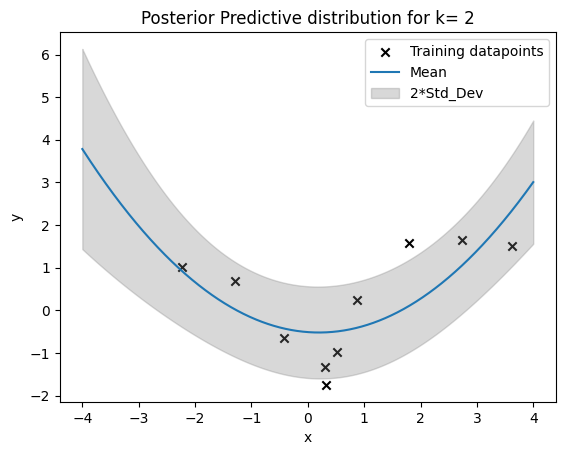

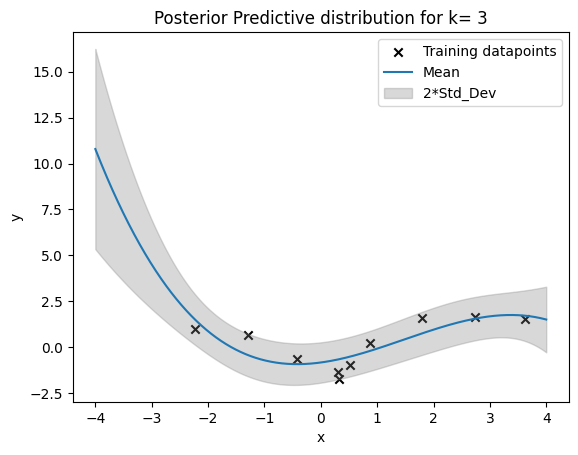

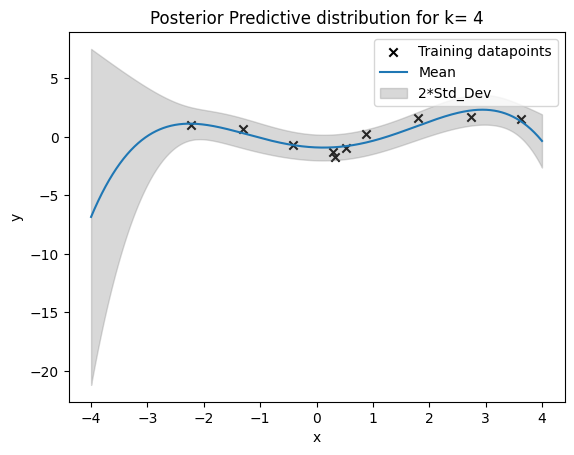

In [6]:
x_test = np.linspace(-4, 4, num=1000)

for k in k_values:
    X = phi_transform(x, k)
    X_test = phi_transform(x_test, k)
    Y = y.reshape(y.shape[0], 1)
    N, D = X.shape
    Sigma_N = np.linalg.inv(_lambda * np.eye(D) + beta * np.matmul(X.T, X))
    mu_N = beta * np.matmul(Sigma_N, np.matmul(X.T, Y))
    
    ppd_std_dev = np.zeros(X_test.shape[0])
    ppd_mean = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):
        x_star = X_test[i].reshape(X_test[i].shape[0], 1)
        ppd_mean[i] = np.matmul(mu_N.T, x_star)
        ppd_var = 1/beta + x_star.T @ Sigma_N @ x_star
        ppd_std_dev[i] = np.sqrt(ppd_var)

    plt.scatter(x, y, c="Black", marker="x")
    plt.plot(x_test, ppd_mean)
    plt.fill_between(x_test, ppd_mean+2*ppd_std_dev, ppd_mean-2*ppd_std_dev, alpha=0.3, color='gray')
    plt.title(f"Posterior Predictive distribution for k= {k}")
    plt.xlabel(r'x')
    plt.ylabel(r'y')
    plt.legend(["Training datapoints", "Mean", "2*Std_Dev"])
    plt.savefig('6_ppd_'+ str(k) + '.png')
    plt.show()

$3.$ Log Marginal Likelihood $\log p\left(\bm{y}\vert\mathbf{X},\beta,\lambda\right) = \log {\mathcal N} \left(\bm{y}\vert\mathbf{0},\beta^{-1} \mathbf{I}_N + \lambda^{-1} \mathbf{X} \mathbf{X}^T \right)$

In [7]:

for k in k_values:
    X = phi_transform(x, k)
    X_test = phi_transform(x_test, k)
    N, D = X.shape
    log_marginal_likelihood = multivariate_normal.logpdf(y, mean=np.zeros(N), cov=1/beta*np.eye(N) + 1/_lambda*X@X.T)
    print(f"Log Marginal Likelihood with k={k} : ", log_marginal_likelihood)

Log Marginal Likelihood with k=1 :  -32.352015280445244
Log Marginal Likelihood with k=2 :  -22.77215317878222
Log Marginal Likelihood with k=3 :  -22.07907064224274
Log Marginal Likelihood with k=4 :  -22.386776180355803


Thus, the model with $k=3$ best fits the model by using log marginal likelihood comparison

$4.$ Log likelihood using MAP estimate $\log p\left(\bm{y} \vert \bm{w}_{\text{MAP}}, \mathbf{X}, \beta\right) = \log {\mathcal N} \left(\bm{y} \vert \mathbf{X} \bm{w}_{\text{MAP}}, \beta^{-1} \mathbf{I}_N\right)$

$w_{\text{MAP}} = \mu_N$ of the posterior distribution derived above

In [8]:
for k in k_values:
    X = phi_transform(x, k)
    Y = y.reshape(y.shape[0], 1)
    N, D = X.shape
    Sigma_N = np.linalg.inv(_lambda * np.eye(D) + beta * np.matmul(X.T, X))
    mu_N = beta * np.matmul(Sigma_N, np.matmul(X.T, Y))

    w_map = mu_N
    log_likelihood = multivariate_normal.logpdf(y, mean=(X@w_map).reshape(N), cov=1/beta*np.eye(N))
    print(f"Log Likelihood with k={k} : ", log_likelihood)

Log Likelihood with k=1 :  -28.094004379075553
Log Likelihood with k=2 :  -15.360663659052214
Log Likelihood with k=3 :  -10.935846883615739
Log Likelihood with k=4 :  -7.225291259028582


Thus, the model with $k=3$ best fits the model by using log likelihood comparison (by $w_{MAP}$)

Generally the marginal likelihood is a better way to compare model performance as it marginalises the likelihood over the weights as opposed to comparing likelihoods for a single estimate (MAP) for weights. But in our given case, the marginal likelihoods come out to be very close for k = 2,3,4 which makes it difficult to choose a best model (probably due to the small training data size). On the other hand, the log likelihood computed using MAP estimate of weights comes out to be different significantly for different values of k.

Thus in this case, log likelihood using MAP estimate of weights is more reasonable in my opinion.

$5.$ From the plots, it is evident that there is no training data at all in [-4,-3], which is indicated by the posterior predictive variance in these regions. So more training data $(x',y')$ should be chosen in [-4,-3] which will help in better model fitting by affecting the posterior, which in turn will help in better predictions in this region.